### Plotting Hours Worked
<ol>Which time of the day is most likely to start </ol>
<ol>which day of the week is the most productive? </ol>
<ol>Longest/Shortest time worked... which day? </ol>
<ol>Average number of hours per day</ol>
<ol>How many hours expected for the next 30 days</ol>


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from matplotlib import style
import datetime as dt
style.use('fivethirtyeight')

%matplotlib inline

In [2]:
df = pd.read_csv('trackin1.csv')

In [3]:
df.head()

,Date,Start Time,End Time,Total Time (mins)
0,13/01/2019,20:48:10,22:50:24,122
1,14/01/2019,22:08:26,23:37:40,89
2,15/01/2019,23:12:07,00:10:49,58
3,16/01/2019,23:48:13,00:18:23,30
4,18/01/2019,00:48:45,01:24:55,36


In [4]:
df['Hours'] = ((df['Total Time (mins)']/60)).round(2)

In [5]:
df.head()

,Date,Start Time,End Time,Total Time (mins),Hours
0,13/01/2019,20:48:10,22:50:24,122,2.03
1,14/01/2019,22:08:26,23:37:40,89,1.48
2,15/01/2019,23:12:07,00:10:49,58,0.97
3,16/01/2019,23:48:13,00:18:23,30,0.50
4,18/01/2019,00:48:45,01:24:55,36,0.60


In [6]:
df['Actual_Dates'] = pd.to_datetime(pd.to_datetime(df['Date'],format = "%d/%m/%Y"))

In [7]:
#group by day and sum the hours for that day
per_day_hours =df.groupby('Actual_Dates').sum()['Hours']
# per_day_hours
per_day_hours.describe()

count    117.000000
mean       1.741197
std        1.455650
min        0.100000
25%        0.780000
50%        1.220000
75%        2.170000
max        6.850000
Name: Hours, dtype: float64

In [8]:
#average number of hours per day 
print('Average number of hours worked per day: {:0.2f} Hours which is {:.2f} Minutes per day'.
      format(per_day_hours.mean(),per_day_hours.mean()*60))

Average number of hours worked per day: 1.74 Hours which is 104.47 Minutes per day


In [9]:
total_hours = df['Hours'].sum()

print('Total Number of hours to today ({}) is: {:0.2f} H. \n\nTotal Minutes: {} M'.
      format(df['Actual_Dates'].iloc[-1].date(),total_hours,
             df['Total Time (mins)'].sum()))

Total Number of hours to today (2019-08-31) is: 203.72 H. 

Total Minutes: 12221 M


In [10]:
df['Start Time'].head()

0    20:48:10
1    22:08:26
2    23:12:07
3    23:48:13
4    00:48:45
Name: Start Time, dtype: object

In [11]:
starting_hour = df['Start Time'].apply(lambda time: dt.datetime.strptime(time,'%H:%M:%S').hour)

In [12]:
top_hours = starting_hour.value_counts()[:3]
hour_occur = [i for i in zip(top_hours.index,top_hours.values)]

print('Top hours to start my coding sessions: ')
for hour,occur in hour_occur:
    print ('Time {}:00 \t Number of Occurances {}'.format(hour,occur))

Top hours to start my coding sessions: 
Time 23:00 	 Number of Occurances 37
Time 21:00 	 Number of Occurances 23
Time 22:00 	 Number of Occurances 23


In [13]:
day_most_worked = df[df['Total Time (mins)'] == df['Total Time (mins)'].max()]
#day_most_worked
# or can be calculated by:
print("Date with Maximum Hours")
df.iloc[df['Total Time (mins)'].idxmax()]

Date with Maximum Hours


Date                          31/03/2019
Start Time                      16:43:01
End Time                        22:28:00
Total Time (mins)                    344
Hours                               5.73
Actual_Dates         2019-03-31 00:00:00
Name: 87, dtype: object

In [14]:
print("Date with Minimum hours: ")
df.iloc[df['Total Time (mins)'].idxmin()]

Date with Minimum hours: 


Date                          01/07/2019
Start Time                      21:05:51
End Time                        21:12:25
Total Time (mins)                      6
Hours                                0.1
Actual_Dates         2019-07-01 00:00:00
Name: 132, dtype: object

In [15]:
hours_per_day = df.groupby('Actual_Dates').sum()['Hours']

In [16]:
hours_per_day.sort_values(ascending=False).head()

Actual_Dates
2019-04-22    6.85
2019-03-31    6.13
2019-06-16    5.90
2019-06-15    5.69
2019-03-08    5.65
Name: Hours, dtype: float64

In [17]:
df['Actual_Dates'].max()

Timestamp('2019-08-31 00:00:00')

In [18]:
## Total number of days works
days_since_start = df['Actual_Dates'].max()-df['Actual_Dates'].min()

print('Total Number of days worked so far is {0}\nAveraging {1:.2f} Minutes/day'.
      format(days_since_start.days,df['Hours'].mean()*60))

Total Number of days worked so far is 230
Averaging 75.92 Minutes/day


In [19]:
df.describe()

,Total Time (mins),Hours
count,161.000000,161.000000
mean,75.906832,1.265342
std,47.937824,0.799074
min,6.000000,0.100000
25%,38.000000,0.630000
50%,69.000000,1.150000
75%,95.000000,1.580000
max,344.000000,5.730000


In [20]:
#Grouped into time series
df_w_dates = df.groupby('Actual_Dates').sum()

In [21]:
df_w_dates.head()

,Total Time (mins),Hours
Actual_Dates,,
2019-01-13,122,2.03
2019-01-14,89,1.48
2019-01-15,58,0.97
2019-01-16,30,0.50
2019-01-18,280,4.66


In [22]:
# to enable plotting by week
df['Week_Number'] = df['Actual_Dates'].dt.week

In [23]:
df['Month'] = df['Actual_Dates'].dt.month
df['Month'].head()

0    1
1    1
2    1
3    1
4    1
Name: Month, dtype: int64

In [24]:
weekly_numbers = df.groupby('Week_Number').sum()['Hours']
weekly_numbers.head()

Week_Number
2     2.03
3    12.20
4     4.82
5     8.24
6    11.37
Name: Hours, dtype: float64

In [25]:
labels_y = ['Week'+str(i) for i in weekly_numbers.index]

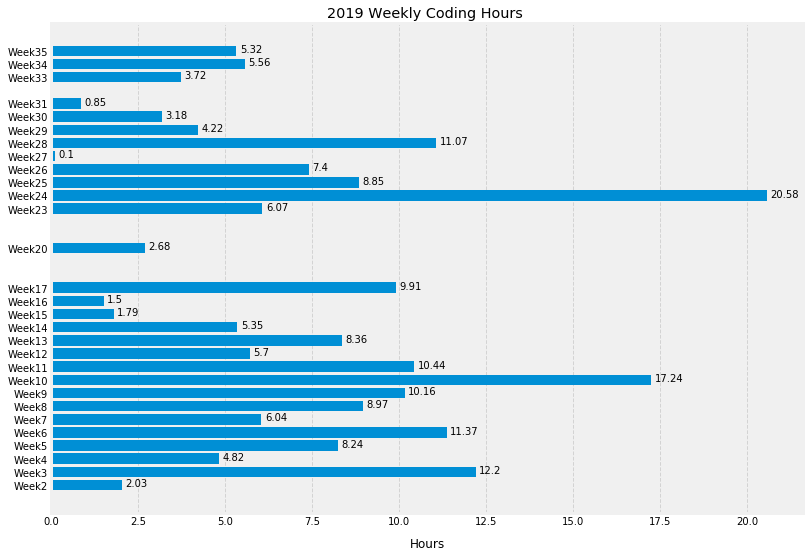

In [26]:
#Another method
fix, ax = plt.subplots(figsize=(12,9))
#fig.subplots_adjust(left=0.115, right=0.88)
labels = ['Week'+str(i) for i in weekly_numbers.index]
pos = weekly_numbers.index
ax.grid(False)

rects=ax.barh(pos,weekly_numbers,tick_label=labels)

ax.set_title('2019 Weekly Coding Hours ')
ax.xaxis.grid(True, linestyle='--', which='major',color='grey', alpha=.25)
x_label = ax.text(.5, -.07, 'Hours',
                        horizontalalignment='center', size='large',transform=ax.transAxes)
plt.yticks()
#setting labels on bars
for rect in rects:
    height = round(rect.get_width(),2)
    ax.text(height+0.1,rect.get_y()+0.3,height,ha='left')

In [27]:
#Monthly Numbers
monthly_numbers = df.groupby('Month').sum()['Hours'].sort_index()
monthly_numbers

Month
1    22.93
2    33.96
3    48.68
4    18.55
5     2.68
6    42.90
7    19.42
8    14.60
Name: Hours, dtype: float64

In [28]:
months_map = {1:'January',
             2:'February',
             3:'March',
             4:'April',
             5:'May',
             6:'June',
             7:'July',
             8:'August',
             9:'September',
             10:'October',
             11:'November',
             12:'December'}

In [29]:
total_hours = df_w_dates['Hours'].sum()

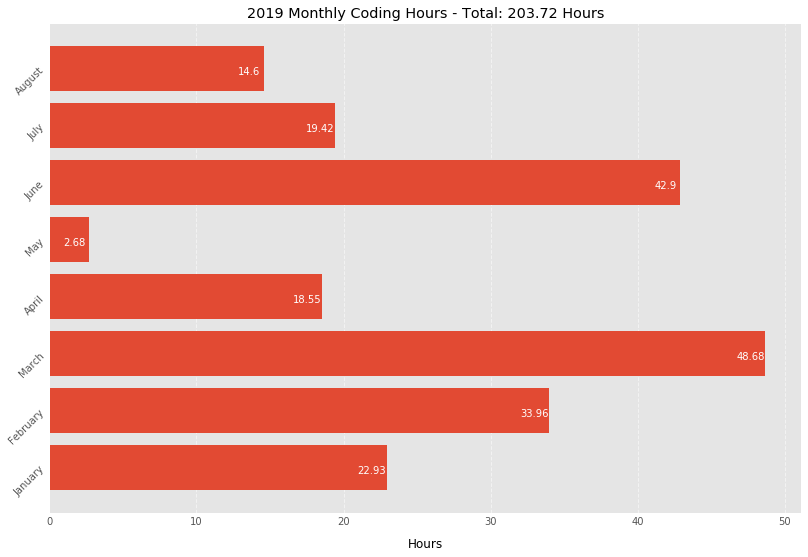

In [30]:
style.use('ggplot')
#Another method
fix, ax = plt.subplots(figsize=(12,9))
#fig.subplots_adjust(left=0.115, right=0.88)
labels = [months_map[i] for i in monthly_numbers.index]
pos = monthly_numbers.index
ax.grid(False)

rects=ax.barh(pos,monthly_numbers,tick_label=labels)

ax.set_title(f'2019 Monthly Coding Hours - Total: {total_hours} Hours')
ax.xaxis.grid(True, linestyle='--', which='major', alpha=.5)
x_label = ax.text(.5, -.07, 'Hours',
                        horizontalalignment='center', size='large',transform=ax.transAxes)
plt.yticks(rotation=45)
#setting labels on bars
for rect in rects:
    height = round(rect.get_width(),2)
    ax.text(height-1,rect.get_y()+0.3,height,ha='left',horizontalalignment='center',color='white')